# Data Preprocessing

In [24]:
import numpy as np  # Import numpy library for efficient array operations
import pandas as pd  # Import pandas library for data processing
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for data visualization

In [25]:
df = pd.read_csv('dataset\Assignment-1_Data.csv', sep=';',parse_dates=['Date'])
df.head()

C:\Users\jramy\AppData\Local\Temp\ipykernel_3088\1604186404.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset\Assignment-1_Data.csv', sep=';',parse_dates=['Date'])


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [26]:
# Convert the 'Price' column to float64 data type after replacing commas with dots
df['Price'] = df['Price'].str.replace(',', '.').astype('float64')

In [27]:
# Display the information about the DataFrame which is to provide an overview of the DataFrame's structure and column data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  float64
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [28]:
# Calculate the number of missing values for each column and sort them in descending order
df.isna().sum().sort_values(ascending=False)

CustomerID    134041
Itemname        1455
BillNo             0
Quantity           0
Date               0
Price              0
Country            0
dtype: int64

In [29]:
# Calculate the total price by multiplying the quantity and price columns
df['Total_Price'] = df.Quantity * df.Price

In [30]:
df.describe(include='all')

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total_Price
count,522064.0,520609,522064.000000,522064,522064.000000,388023.000000,522064,522064.000000
unique,21665.0,4185,NaN,19641,NaN,NaN,30,NaN
top,573585.0,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31.10.2011 14:41,NaN,NaN,United Kingdom,NaN
freq,1114.0,2269,NaN,1114,NaN,NaN,487622,NaN
mean,NaN,NaN,10.090435,NaN,3.826801,15316.931710,NaN,19.690633
std,NaN,NaN,161.110525,NaN,41.900599,1721.846964,NaN,273.068938
min,NaN,NaN,-9600.000000,NaN,-11062.060000,12346.000000,NaN,-11062.060000
25%,NaN,NaN,1.000000,NaN,1.250000,13950.000000,NaN,3.750000
50%,NaN,NaN,3.000000,NaN,2.080000,15265.000000,NaN,9.780000
75%,NaN,NaN,10.000000,NaN,4.130000,16837.000000,NaN,17.400000


In [31]:
# Print the number of unique countries in the 'Country' column
print("Number of unique countries:", df['Country'].nunique())

# Calculate and print the normalized value counts of the top 5 countries in the 'Country' column
print(df['Country'].value_counts(normalize=True)[:5])

Number of unique countries: 30
Country
United Kingdom    0.934027
Germany           0.017320
France            0.016105
Spain             0.004760
Netherlands       0.004526
Name: proportion, dtype: float64


In [32]:
# Delete the 'Country' column from the DataFrame
df.drop('Country', axis=1, inplace=True)

In [33]:
# Filter the DataFrame to display rows where 'BillNo' column contains non-digit values
df[df['BillNo'].str.isdigit() == False]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
288772,A563185,Adjust bad debt,1,12.08.2011 14:50,11062.06,NaN,11062.06
288773,A563186,Adjust bad debt,1,12.08.2011 14:51,-11062.06,NaN,-11062.06
288774,A563187,Adjust bad debt,1,12.08.2011 14:52,-11062.06,NaN,-11062.06


In [34]:
# Remove rows where the 'Itemname' column contains "Adjust bad debt"
df = df[df['Itemname'] != "Adjust bad debt"]

In [35]:
# Here to check if all BillNo doesn't inculde letters 
df['BillNo'].astype("int64")

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
522059    581587
522060    581587
522061    581587
522062    581587
522063    581587
Name: BillNo, Length: 522061, dtype: int64

In [36]:
# Calculate the sum of 'Price' for rows where 'Itemname' is missing
df[df['Itemname'].isna()] ['Price'].sum()

0.0

In [37]:
# Filter the DataFrame to display rows where 'Itemname' is missing
df[df['Itemname'].isna()]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
613,536414,NaN,56,01.12.2010 11:52,0.0,NaN,0.0
1937,536545,NaN,1,01.12.2010 14:32,0.0,NaN,0.0
1938,536546,NaN,1,01.12.2010 14:33,0.0,NaN,0.0
1939,536547,NaN,1,01.12.2010 14:33,0.0,NaN,0.0
1940,536549,NaN,1,01.12.2010 14:34,0.0,NaN,0.0
...,...,...,...,...,...,...,...
515623,581199,NaN,-2,07.12.2011 18:26,0.0,NaN,-0.0
515627,581203,NaN,15,07.12.2011 18:31,0.0,NaN,0.0
515633,581209,NaN,6,07.12.2011 18:35,0.0,NaN,0.0
517266,581234,NaN,27,08.12.2011 10:33,0.0,NaN,0.0


A curious observation has caught our attention—the presence of a negative quantity in the 515,623rd row. 

In [38]:
# Filter the DataFrame to display rows where 'Quantity' is less than 1
df[df['Quantity'] < 1]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
2359,536589,NaN,-10,01.12.2010 16:50,0.0,NaN,-0.0
4289,536764,NaN,-38,02.12.2010 14:42,0.0,NaN,-0.0
6998,536996,NaN,-20,03.12.2010 15:30,0.0,NaN,-0.0
6999,536997,NaN,-20,03.12.2010 15:30,0.0,NaN,-0.0
7000,536998,NaN,-6,03.12.2010 15:30,0.0,NaN,-0.0
...,...,...,...,...,...,...,...
515634,581210,check,-26,07.12.2011 18:36,0.0,NaN,-0.0
515636,581212,lost,-1050,07.12.2011 18:38,0.0,NaN,-0.0
515637,581213,check,-30,07.12.2011 18:38,0.0,NaN,-0.0
517209,581226,missing,-338,08.12.2011 09:56,0.0,NaN,-0.0


In [39]:
# Remove rows where 'Quantity' is less than 1
df = df[df['Quantity'] >= 1]

In [40]:
# Select a random sample of 30 rows where 'CustomerID' is missing
df[df['CustomerID'].isna()].sample(30)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
15239,537638,YELLOW METAL CHICKEN HEART,2,07.12.2010 15:28,3.36,NaN,6.72
166616,551547,RED STRIPE CERAMIC DRAWER KNOB,5,03.05.2011 09:44,2.46,NaN,12.30
247315,559494,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,08.07.2011 13:54,3.29,NaN,3.29
509750,580730,HAND WARMER BIRD DESIGN,3,05.12.2011 17:28,4.13,NaN,12.39
509932,580730,T-LIGHT HOLDER HANGING LOVE BIRD,1,05.12.2011 17:28,7.46,NaN,7.46
384565,571305,RED RETROSPOT BOWL,8,17.10.2011 09:55,2.46,NaN,19.68
442767,575900,TRAVEL CARD WALLET VINTAGE TICKET,1,11.11.2011 15:14,0.42,NaN,0.42
496797,579787,DINOSAURS WRITING SET,2,30.11.2011 15:33,3.29,NaN,6.58
453108,576618,WHITE ROCKING HORSE HAND PAINTED,1,15.11.2011 17:00,2.46,NaN,2.46
327233,566603,TEA TIME PARTY BUNTING,2,13.09.2011 16:12,4.95,NaN,9.90


In [41]:
# Counting the number of rows where the price is zero
zero_price_count = len(df[df['Price'] == 0])
print("Number of rows where price is zero:", zero_price_count)

# Counting the number of rows where the price is negative
negative_price_count = len(df[df['Price'] < 0])
print("Number of rows where price is negative:", negative_price_count)

Number of rows where price is zero: 1175
Number of rows where price is negative: 0


In [42]:
# Selecting a random sample of 20 rows where the price is zero
df[df['Price'] == 0].sample(20)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
510259,580743,NaN,1,06.12.2011 09:30,0.0,NaN,0.0
323711,566325,taig adjust,36,12.09.2011 12:03,0.0,NaN,0.0
323608,566316,NaN,682,12.09.2011 10:07,0.0,NaN,0.0
186579,553521,STRAWBERRY FAIRY CAKE TEAPOT,1,17.05.2011 14:35,0.0,NaN,0.0
112335,546240,NaN,20,10.03.2011 13:00,0.0,NaN,0.0
307945,564922,NaN,5,31.08.2011 12:43,0.0,NaN,0.0
188844,553729,NaN,2,18.05.2011 17:17,0.0,NaN,0.0
72538,542508,NaN,136,28.01.2011 12:06,0.0,NaN,0.0
502098,580366,FRIDGE MAGNETS LES ENFANTS ASSORTED,6,02.12.2011 16:38,0.0,NaN,0.0
272552,561665,?,142,28.07.2011 16:55,0.0,NaN,0.0


#### Removing Rows with Zero Price: Eliminating Misleading Data Entries

Upon reviewing the sample of rows where the price is zero, we have identified that these entries might provide misleading or inaccurate information for our analysis. Therefore, it is prudent to proceed with removing these rows from the dataset to ensure the integrity and reliability of our analysis.

In [43]:
# Remove rows where the price is zero
df = df[df['Price'] != 0]

# Data Analysis

Text(0.5, 0, 'Date (Month)')

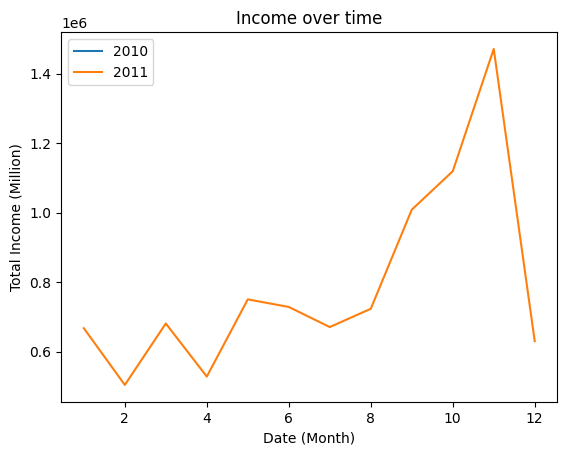

In [53]:
# Grouping the data by month and summing the total price for the year 2010
# Assuming 'Date' column is in a non-standard date format, specify the format
df["Date"] = pd.to_datetime(df['Date'], format="%d.%m.%Y %H:%M")

# Grouping the data by month and summing the total price for the year 2010
df[df["Date"].dt.year == 2010].groupby(df["Date"].dt.month)["Total_Price"].sum().plot()

# Grouping the data by month and summing the total price for the year 2011
df[df["Date"].dt.year == 2011].groupby(df["Date"].dt.month)["Total_Price"].sum().plot()
# Adding legend and plot labels
plt.legend(["2010","2011"])
plt.title("Income over time")
plt.ylabel('Total Income (Million)')
plt.xlabel("Date (Month)")

In [45]:
df["Date"].max()

Timestamp('2011-12-09 12:50:00')

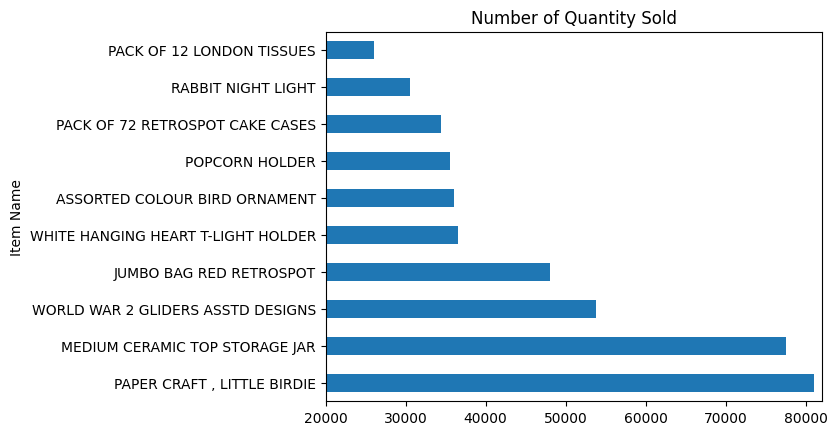

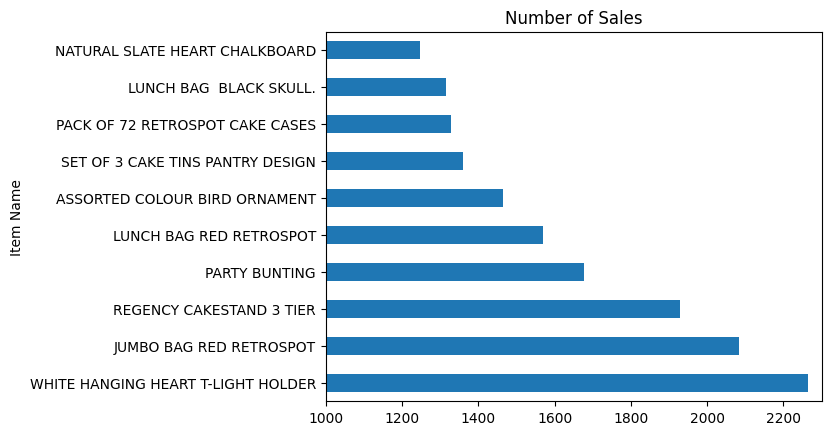

In [46]:
# Plotting the top 10 most sold products by quantity
df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Number of Quantity Sold')
plt.ylabel('Item Name')
plt.xlim(20000, 82000)
plt.show()

# Plotting the top 10 most sold products by count
df['Itemname'].value_counts(ascending=False)[:10].plot(kind='barh', title='Number of Sales')
plt.ylabel('Item Name')
plt.xlim(1000, 2300)
plt.show()